In [42]:
import matplotlib.pyplot as  plt
import pandas as pd
import seaborn as sns

In [43]:
titanic_df=pd.read_csv('Titanic_Data.csv')

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


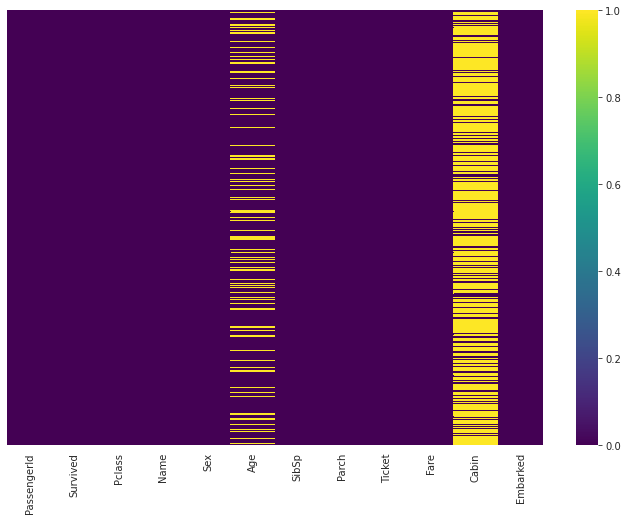

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic_df.isnull(),yticklabels=False,cmap='viridis')

In [48]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
titanic_df.drop(['Cabin'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


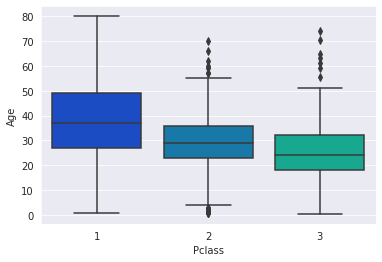

In [50]:
sns.boxplot(titanic_df['Pclass'],titanic_df['Age'],palette="winter")

In [51]:
def impute(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    return Age

In [52]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(impute,axis=1)

In [53]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [54]:
titanic_df.dropna(inplace=True)

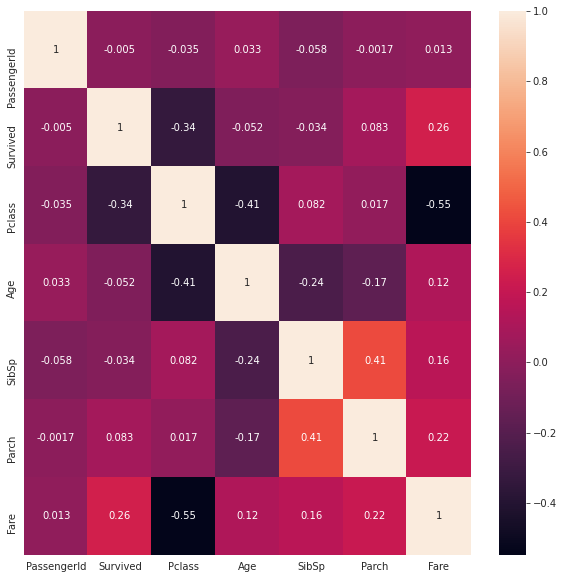

In [55]:
##Feature Selection
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr(),annot=True)

In [56]:
gender=pd.get_dummies(titanic_df['Sex'])
embarked=pd.get_dummies(titanic_df['Embarked'])

In [57]:
titanic_new=pd.concat([titanic_df,gender,embarked],axis=1)

In [58]:
titanic_new.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1


In [59]:
titanic_new.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [60]:
titanic_new.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
       'C', 'Q', 'S'],
      dtype='object')

In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
min_max.fit(titanic_new[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [62]:
X=titanic_new.drop(['Survived'],axis=1)
Y=titanic_new['Survived']

In [63]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [65]:
from sklearn.linear_model import LogisticRegression
logit_reg=LogisticRegression(C=1e4,max_iter=1e5,solver='liblinear')
logit_reg.fit(X_train,Y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000.0,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
logit_reg.score(X_test,Y_test)

0.848314606741573

In [67]:
yhat=logit_reg.predict(X_test)

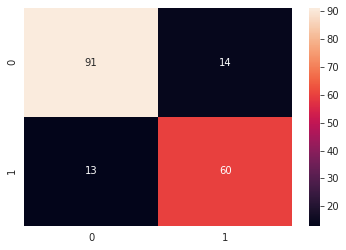

In [68]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,yhat),annot=True)

#**Making a Single Prediction**

In [69]:
logit_reg.predict([[1,25,0,0,73,0,1,0,0,1]])

array([1])